# ***ANN-ARTIFICIAL NEURAL NETWORK***

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [3]:
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')

In [12]:
X_train = train.drop('label', axis=1).values
y_train = train['label'].values
X_test = test.drop('label', axis=1).values
y_test = test['label'].values

In [13]:
X_train = X_train/255.0
X_test = X_test/255.0

In [14]:
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [28]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs=10, batch_size=32,validation_split = 0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8548 - loss: 0.4828 - val_accuracy: 0.9542 - val_loss: 0.1510
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9642 - loss: 0.1174 - val_accuracy: 0.9680 - val_loss: 0.1043
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9761 - loss: 0.0775 - val_accuracy: 0.9696 - val_loss: 0.0995
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9825 - loss: 0.0538 - val_accuracy: 0.9692 - val_loss: 0.1041
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9874 - loss: 0.0396 - val_accuracy: 0.9688 - val_loss: 0.1102
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9881 - loss: 0.0381 - val_accuracy: 0.9723 - val_loss: 0.1066
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9912 - loss: 0.0276 - val_accuracy: 0.9747 - val_loss: 0.0970
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9920 - loss: 0.0245 

In [18]:
loss,accuracy = model.evaluate(X_test,y_test)
print('Test Loss:',loss)
print('Test Accuracy:',accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9727 - loss: 0.1156
Test Loss: 0.09816908836364746
Test Accuracy: 0.9763000011444092


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


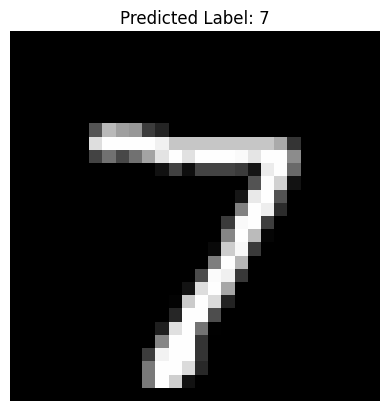

In [27]:
import matplotlib.pyplot as plt
image = X_test[0].reshape(28,28)
plt.imshow(image,cmap='gray')
plt.title('Predicted Label: {}'.format(np.argmax(model.predict(X_test[0].reshape(1,784)))))
plt.axis('off')
plt.show()